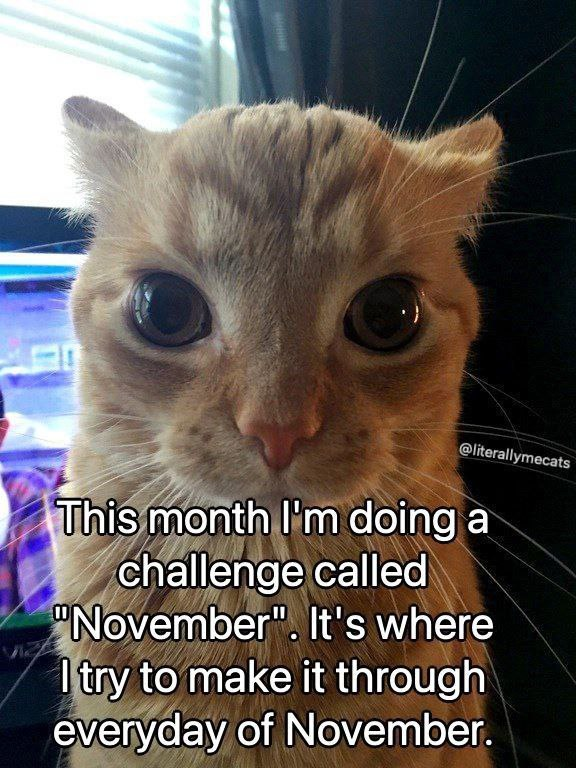

Машинное обучение — это создание программ с настраиваемыми параметрами, которые автоматически корректируются, чтобы улучшить их поведение путем адаптации к ранее полученным данным.

Машинное обучение можно считать подразделом искусственного интеллекта, поскольку эти алгоритмы можно рассматривать как строительные блоки, позволяющие компьютерам учиться вести себя более разумно, каким-то образом обобщая, а не просто сохраняя и извлекая элементы данных, как это делает система баз данных.

Советую: https://education.yandex.ru/handbook/ml

Мы рассмотрим здесь две очень простые задачи машинного обучения. Первая — это задача классификации: на рисунке показан набор двумерных данных, окрашенных в соответствии с двумя различными метками классов. Алгоритм классификации может быть использован для рисования разделительной границы между двумя кластерами точек:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_blobs

In [ ]:
# we create 50 separable synthetic points
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01, fit_intercept=True)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.contour(
    X1, X2, Z, [-1.0, 0.0, 1.0], colors="k", linestyles=["dashed", "solid", "dashed"]
)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap="Paired")

ax.axis("tight")


plt.show()

Следующая простая задача, которую мы рассмотрим, — это задача регрессии: простая линия наилучшего соответствия набору данных.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# x from 0 to 30
rng = np.random.default_rng()
x = 30 * rng.random((20, 1))

# y = a*x + b with noise
y = 0.5 * x + 1.0 + rng.normal(size=x.shape)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel("x")
ax.set_ylabel("y")

ax.axis("tight")


plt.show()

## Data in scikit-learn  
Алгоритмы машинного обучения, реализованные в scikit-learn, ожидают, что данные будут храниться в двумерном массиве или матрице. Массивы могут быть либо массивами numpy, либо в некоторых случаях матрицами scipy.sparse. Ожидается, что размер массива будет **[n_samples, n_features]**

**n_samples:** Количество образцов: каждый образец — это элемент для обработки (например, классификации). Образцом может быть документ, изображение, звук, видео, астрономический объект, строка в базе данных или CSV-файле или что угодно, что вы можете описать с помощью фиксированного набора количественных признаков.

**n_features:** Количество признаков или отдельных признаков, которые можно использовать для описания каждого элемента количественным образом. Признаки обычно имеют действительные значения, но в некоторых случаях могут иметь булевы или дискретные значения.

(!) Количество признаков должно быть зафиксировано заранее. Однако оно может быть очень многомерным (например, миллионы признаков), большинство из которых будут нулями для данной выборки. Это случай, когда матрицы scipy.sparse могут быть полезны, поскольку они гораздо более эффективны с точки зрения памяти, чем массивы NumPy.

### the Iris Dataset

Предположим, мы хотим распознать виды ирисов. Данные состоят из измерений трех различных видов ирисов:  
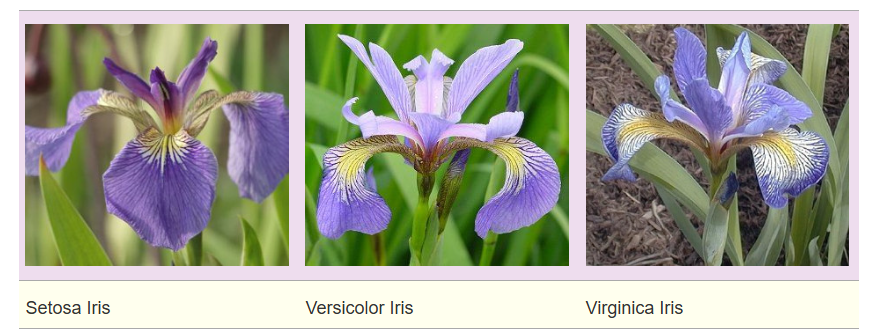

Если мы хотим разработать алгоритм для распознавания видов ирисов, какими могут быть данные?

Помните: нам нужен двумерный массив размером **[n_samples x n_features]**.

На что будет ссылаться **n_samples**?

На что может ссылаться **n_features**?

Scikit-learn имеет очень простой набор данных по этим видам ирисов. Данные состоят из следующего:

Функции в наборе данных Iris:
*   длина чашелистика (см) (sepal length (cm))
*   ширина чашелистика (см) (sepal width (cm))
*   длина лепестка (см)  (petal length (cm))
*   ширина лепестка (см) (petal width (cm))

Целевые классы для прогнозирования:

* Setosa
* Versicolour
* Virginica  

scikit-learn встраивает копию CSV-файла ириса вместе с функцией для его загрузки в массивы NumPy:

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
print(iris.data.shape)

In [ ]:
n_samples, n_features = iris.data.shape
print(n_samples)
print(n_features)

Характеристики каждого образца цветка хранятся в атрибуте **data** набора данных:

In [ ]:
print(iris.data[0])

Информация о классе каждого образца хранится в **target** атрибуте набора данных:

In [ ]:
print(iris.target.shape)
print(iris.target)

Имена классов хранятся в последнем атрибуте, а именно **target_names**:

In [ ]:
print(iris.target_names)

Эти данные являются четырехмерными, но мы можем визуализировать два измерения одновременно, используя диаграмму рассеяния:

In [ ]:
# Load the data
from sklearn.datasets import load_iris

iris = load_iris()

from matplotlib import ticker
import matplotlib.pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = ticker.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

### Introducing the scikit-learn estimator object

Каждый алгоритм представлен в scikit-learn через объект **‘’Estimator’’**. Например, линейная регрессия: **sklearn.linear_model.LinearRegression**

In [12]:
from sklearn.linear_model import LinearRegression

Estimator parameters: все параметры оценщика могут быть установлены при его создании:

In [ ]:
model = LinearRegression(n_jobs=1)
print(model)

### Fitting on data

Когда данные подгоняются под estimator, параметры оцениваются на основе имеющихся данных. Все оцениваемые параметры являются атрибутами объекта оценщика, заканчивающимися подчеркиванием:

In [ ]:
import numpy as np
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])
X = x[:, np.newaxis] # The input data for sklearn is 2D: (samples == 3 x features == 1)
X
model.fit(X, y)

In [ ]:
model.coef_

### Supervised Learning: Classification and regression  

В Supervised Learning у нас есть набор данных, состоящий как из признаков, так и из меток. Задача состоит в том, чтобы построить оценщик, который способен предсказать метку объекта по набору признаков. Относительно простой пример — предсказать вид ириса по набору измерений его цветка. Это относительно простая задача. Вот несколько более сложных примеров:

при наличии многоцветного изображения объекта через телескоп определите, является ли этот объект звездой, квазаром или галактикой.

при наличии фотографии человека идентифицируйте человека на фотографии.

при наличии списка фильмов, которые посмотрел человек, и его личной оценки фильма порекомендуйте список фильмов, которые ему бы понравились (так называемые рекомендательные системы: известный пример — Netflix).

Supervised Learning далее делится на две категории: классификация и регрессия. В классификации метка дискретна, а в регрессии метка непрерывна.   
Например, в астрономии задача определения, является ли объект звездой, галактикой или квазаром, является проблемой классификации: метка относится к трем различным категориям. С другой стороны, мы можем захотеть оценить возраст объекта на основе таких наблюдений: это будет проблема регрессии, поскольку метка (возраст) является непрерывной величиной.

**Classification**   
K ближайших соседей (kNN) — одна из самых простых стратегий обучения: учитывая новое неизвестное наблюдение, найдите в своей справочной базе данных, какие из них имеют самые близкие характеристики, и назначьте преобладающий класс. Давайте попробуем это на нашей проблеме классификации радужной оболочки глаза:

In [ ]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print(iris.target_names[knn.predict([[3, 5, 4, 2]])])

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

In [ ]:
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.axis("tight")

А теперь повторим анализ с 3 соседями.

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.axis("tight")

plt.show()

**Regression:**  
Простейшей возможной настройкой регрессии является линейная регрессия:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# x from 0 to 30
rng = np.random.default_rng()
x = 30 * rng.random((20, 1))

# y = a*x + b with noise
y = 0.5 * x + 1.0 + rng.normal(size=x.shape)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel("x")
ax.set_ylabel("y")

ax.axis("tight")


plt.show()

Scikit-learn стремится иметь единый интерфейс для всех методов, и мы увидим примеры ниже. При наличии объекта оценки scikit-learn с именем model доступны следующие методы:
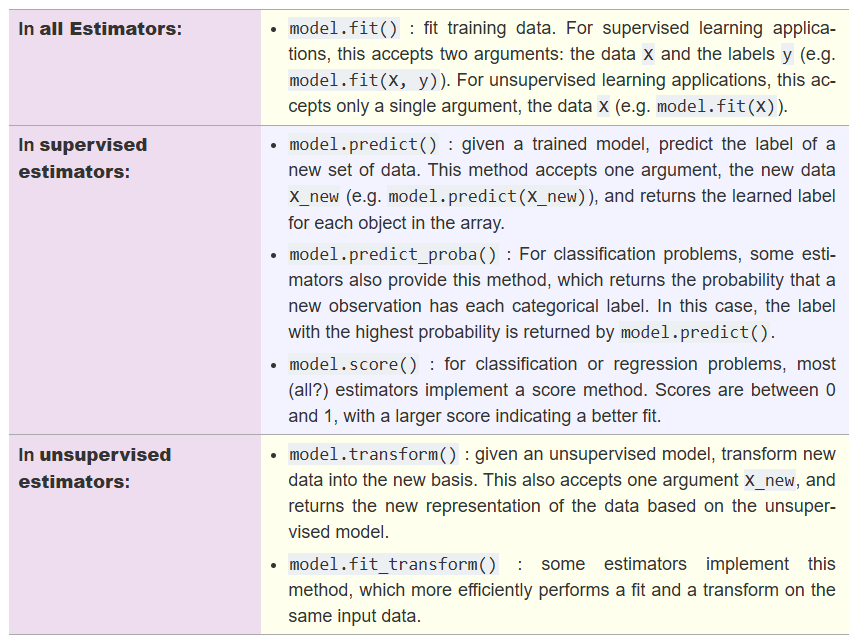


### Regularization: what it is and why it is necessary  
**Ошибки в тренировочном наборе **  
Предположим, вы используете 1-nearest neighbor estimator. Сколько ошибок вы ожидаете в вашем тренировочном наборе?

* Ошибка тренировочного набора не является хорошим показателем эффективности прогнозирования. Вам нужно исключить тестовый набор.

* В общем случае мы должны принимать ошибки в тренировочном наборе.  

**Пример регуляризации**  
Основная идея регуляризации заключается в том, что мы будем отдавать предпочтение более простым моделям (в определенном смысле слова «более простым»), даже если они приводят к большему количеству ошибок в обучающей выборке.  

В качестве примера давайте сгенерируем с помощью полинома 9-го порядка с шумом:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import linear_model

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])


rng = np.random.default_rng(27446968)
x = 2 * rng.random(100) - 1

f = lambda t: 1.2 * t**2 + 0.1 * t**3 - 0.4 * t**5 - 0.5 * t**9
y = f(x) + 0.4 * rng.normal(size=100)

x_test = np.linspace(-1, 1, 100)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)

Подгонка полиномов 4-го и 9-го порядка

Для этого нам нужно спроектировать признаки: n_th степени x:

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)

X = np.array([x**i for i in range(5)]).T
X_test = np.array([x_test**i for i in range(5)]).T
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(x_test, regr.predict(X_test), label="4th order")

X = np.array([x**i for i in range(10)]).T
X_test = np.array([x_test**i for i in range(10)]).T
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(x_test, regr.predict(X_test), label="9th order")

plt.legend(loc="best")
plt.axis("tight")
plt.title("Fitting a 4th and a 9th order polynomial")

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)
plt.plot(x_test, f(x_test), label="truth")
plt.axis("tight")
plt.title("Ground truth (9th order polynomial)")

plt.show()

Регуляризация повсеместно распространена в машинном обучении. Большинство оценщиков scikit-learn имеют параметр для настройки объема регуляризации. Например, в случае k-NN это «k», количество ближайших соседей, используемых для принятия решения. k=1 означает отсутствие регуляризации: 0 ошибок на обучающем наборе, тогда как большое k будет подталкивать к более гладким границам принятия решений в пространстве признаков.

### Simple versus complex models for classification

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm


rng = np.random.default_rng(27446968)

In [ ]:
def linear_model(rseed=42, n_samples=30):
    "Generate data according to a linear model"
    np.random.seed(rseed)

    data = np.random.normal(0, 10, (n_samples, 2))
    data[: n_samples // 2] -= 15
    data[n_samples // 2 :] += 15

    labels = np.ones(n_samples)
    labels[: n_samples // 2] = -1

    return data, labels


X, y = linear_model()
clf = svm.SVC(kernel="linear")
clf.fit(X, y)

plt.figure(figsize=(6, 4))
ax = plt.subplot(111, xticks=[], yticks=[])
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="bone")

ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=80,
    edgecolors="k",
    facecolors="none",
)

delta = 1
y_min, y_max = -50, 50
x_min, x_max = -50, 50
x = np.arange(x_min, x_max + delta, delta)
y = np.arange(y_min, y_max + delta, delta)
X1, X2 = np.meshgrid(x, y)
Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

ax.contour(
    X1, X2, Z, [-1.0, 0.0, 1.0], colors="k", linestyles=["dashed", "solid", "dashed"]
)

In [ ]:
def nonlinear_model(rseed=27446968, n_samples=30):
    rng = np.random.default_rng(rseed)

    radius = 40 * rng.random(n_samples)
    far_pts = radius > 20
    radius[far_pts] *= 1.2
    radius[~far_pts] *= 1.1

    theta = rng.random(n_samples) * np.pi * 2

    data = np.empty((n_samples, 2))
    data[:, 0] = radius * np.cos(theta)
    data[:, 1] = radius * np.sin(theta)

    labels = np.ones(n_samples)
    labels[far_pts] = -1

    return data, labels


X, y = nonlinear_model()
clf = svm.SVC(kernel="rbf", gamma=0.001, coef0=0, degree=3)
clf.fit(X, y)

plt.figure(figsize=(6, 4))
ax = plt.subplot(1, 1, 1, xticks=[], yticks=[])
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="bone", zorder=2)

ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=80,
    edgecolors="k",
    facecolors="none",
)

delta = 1
y_min, y_max = -50, 50
x_min, x_max = -50, 50
x = np.arange(x_min, x_max + delta, delta)
y = np.arange(y_min, y_max + delta, delta)
X1, X2 = np.meshgrid(x, y)
Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

ax.contour(
    X1,
    X2,
    Z,
    [-1.0, 0.0, 1.0],
    colors="k",
    linestyles=["dashed", "solid", "dashed"],
    zorder=1,
)

plt.show()

## Supervised Learning: Classification of Handwritten Digits  
В этом разделе мы применим scikit-learn к классификации рукописных цифр. Это немного выйдет за рамки классификации ирисов, которую мы видели ранее: мы обсудим некоторые метрики, которые можно использовать при оценке эффективности модели классификации.

In [27]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Построим проекцию на 2 главные оси

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

Для большинства проблем классификации неплохо иметь простой и быстрый метод для предоставления быстрой базовой классификации. Если простого и быстрого метода достаточно, то нам не придется тратить циклы CPU на более сложные модели. Если нет, мы можем использовать результаты простого метода, чтобы получить подсказки о наших данных.

Один хороший метод, который следует иметь в виду, — это наивный байесовский метод (sklearn.naive_bayes.GaussianNB).

Gaussian Naive Bayes подбирает гауссовское распределение к каждой обучающей метке независимо по каждому признаку и использует это для быстрого получения грубой классификации. Обычно он недостаточно точен для данных реального мира, но может работать на удивление хорошо, например, на текстовых данных.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap="binary", interpolation="nearest")

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color="green")
    else:
        ax.text(0, 7, str(predicted[i]), color="red")

Quantify the performance

In [ ]:
matches = predicted == expected
print(matches.sum())

In [ ]:
print(len(matches))

In [ ]:
matches.sum() / float(len(matches))

In [ ]:
from sklearn import metrics

print(metrics.classification_report(expected, predicted))

In [ ]:
print(metrics.confusion_matrix(expected, predicted))

plt.show()

## Supervised Learning: Regression of Housing Data
Здесь мы рассмотрим небольшой пример задачи регрессии: получение непрерывного значения из набора признаков.

In [36]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

A quick look at the data  
Мы будем использовать набор цен на жилье в Калифорнии, доступный в scikit-learn. Он записывает измерения 8 признаков рынков жилья в Калифорнии, а также медианную цену. Вопрос в следующем: можете ли вы предсказать цену нового рынка, учитывая его атрибуты?:

In [ ]:
print(data.data.shape)
print(data.target.shape)

In [ ]:
print(data.DESCR)

Print a histogram of the quantity to predict: price

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
plt.hist(data.target)
plt.xlabel("price ($100k)")
plt.ylabel("count")
plt.tight_layout()

Print the join histogram for each feature

In [ ]:
for index, feature_name in enumerate(data.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(data.data[feature_name], data.target)
    plt.ylabel("Price", size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

Simple prediction

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 8], [0, 8], "--k")
plt.axis("tight")
plt.xlabel("True price ($100k)")
plt.ylabel("Predicted price ($100k)")
plt.tight_layout()

Prediction with gradient boosted tree

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 5], [0, 5], "--k")
plt.axis("tight")
plt.xlabel("True price ($100k)")
plt.ylabel("Predicted price ($100k)")
plt.tight_layout()

In [ ]:
import numpy as np

print(f"RMS: {np.sqrt(np.mean((predicted - expected) ** 2))!r} ")

plt.show()

### Measuring prediction performance  
Здесь мы продолжим рассматривать данные цифр, но переключимся на классификатор K-соседей. Классификатор K-соседей — это классификатор на основе экземпляров. Классификатор K-соседей предсказывает метку неизвестной точки на основе меток K ближайших точек в пространстве параметров.

In [ ]:
# Get the data
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

# Instantiate and train the classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)

# Check the results using metrics
from sklearn import metrics
y_pred = clf.predict(X)

print(metrics.confusion_matrix(y_pred, y))

Судя по всему, мы нашли идеальный классификатор! Но это вводит в заблуждение по причинам, которые мы видели ранее: классификатор по сути «запоминает» все образцы, которые он уже видел. Чтобы действительно проверить, насколько хорошо работает этот алгоритм, нам нужно попробовать некоторые образцы, которые он еще не видел.

Эта проблема также возникает с регрессионными моделями. Далее мы подгоняем другую модель на основе экземпляров под названием «дерево решений» к набору данных о ценах на жилье в Калифорнии, который мы представили ранее:

In [45]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

In [46]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor().fit(data.data, data.target)

predicted = clf.predict(data.data)
expected = data.target

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 5], [0, 5], "--k")
plt.axis("tight")
plt.xlabel("True price ($100k)")
plt.ylabel("Predicted price ($100k)")
plt.tight_layout()

Почти никаких ошибок!

Это слишком хорошо, чтобы быть правдой: мы тестируем модель на обучающих данных, что не является мерой обобщения.


### A correct approach: Using a validation set

Изучение параметров функции прогнозирования и ее тестирование на тех же данных является методологической ошибкой: модель, которая просто повторяла бы метки образцов, которые она только что видела, имела бы идеальную оценку, но не смогла бы предсказать ничего полезного на еще не виденных данных.

Чтобы избежать переобучения, мы должны определить два разных набора:

* обучающий набор **X_train**, **y_train**, который используется для обучения параметров предиктивной модели

* тестовый набор **X_test**, **y_test**, который используется для оценки подобранной предиктивной модели  

В **scikit-learn** такое случайное разделение можно быстро вычислить с помощью функции **train_test_split()**:

In [ ]:
from sklearn import model_selection
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                        test_size=0.25, random_state=0)
print("%r, %r, %r" % (X.shape, X_train.shape, X_test.shape))

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Усредненный f1-score часто используется как удобная мера общей производительности алгоритма. Он отображается в нижней строке отчета классификации; к нему также можно получить прямой доступ:

In [ ]:
metrics.f1_score(y_test, y_pred, average="macro")

Переобучение, которое мы наблюдали ранее, можно количественно оценить, вычислив оценку f1 на самих обучающих данных:

In [ ]:
metrics.f1_score(y_train, clf.predict(X_train), average="macro")

Мы применили Gaussian Naives, support vectors machines и классификаторы K-ближайших соседей к набору данных digits. Теперь, когда у нас есть эти инструменты проверки, мы можем количественно спросить, какой из трех оценщиков лучше всего подходит для этого набора данных.  

С гиперпараметрами по умолчанию для каждого оценщика, который дает наилучшую оценку f1 на проверочном наборе? Вспомните, что гиперпараметры — это параметры, заданные при создании экземпляра классификатора: например, n_neighbors в clf = KNeighborsClassifier(n_neighbors=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                            test_size=0.25, random_state=0)
for Model in [GaussianNB(), KNeighborsClassifier(), LinearSVC(dual=False)]:
    clf = Model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('%s: %s' %
          (Model.__class__.__name__, metrics.f1_score(y_test, y_pred, average="macro")))

Для каждого классификатора, какое значение гиперпараметров дает наилучшие результаты для данных цифр? Для **LinearSVC** используйте **loss='l2'** и **loss='l1'**. Для **KNeighborsClassifier** мы используем **n_neighbors** от **1** до **10**. Обратите внимание, что **GaussianNB** не имеет настраиваемых гиперпараметров.

In [ ]:
from sklearn import model_selection, datasets, metrics
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# test SVC loss
for loss in ["hinge", "squared_hinge"]:
    clf = LinearSVC(loss=loss).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(
        f"LinearSVC(loss='{loss}'): {metrics.f1_score(y_test, y_pred, average='macro')}"
    )

print("-------------------")

# test the number of neighbors
for n_neighbors in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(
        f"KNeighbors(n_neighbors={n_neighbors}): {metrics.f1_score(y_test, y_pred, average='macro')}"
    )

### Cross-validation  
**Cross-validation** (Перекрестная проверка) заключается в многократном разделении данных на пары обучающих и тестовых наборов, называемых «folds (складками)». Scikit-learn поставляется с функцией для автоматического вычисления оценки по всем этим складкам. Здесь мы делаем KFold с k=5.

In [ ]:
clf = KNeighborsClassifier()

from sklearn.model_selection import cross_val_score

cross_val_score(clf, X, y, cv=5)

Мы можем использовать различные стратегии разделения, например случайное разделение:

In [ ]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5)
cross_val_score(clf, X, y, cv=cv)

### Hyperparameter optimization with cross-validation  
Рассмотрим регуляризованные линейные модели, такие как **Ridge Regression**, которая использует регуляризацию **l2**, и **Lasso Regression**, которая использует регуляризацию **l1**. Выбор их параметра регуляризации важен.

Давайте установим эти параметры в наборе данных **Diabetes**, простой задаче регрессии. Данные по диабету состоят из 10 физиологических переменных (возраст, пол, вес, артериальное давление), измеренных у 442 пациентов, и показателя прогрессирования заболевания через год:

In [ ]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
X, y = data.data, data.target
print(X.shape)

С гиперпараметрами по умолчанию: мы вычисляем оценку перекрестной проверки:

In [ ]:
from sklearn.linear_model import Ridge, Lasso

for Model in [Ridge, Lasso]:
    model = Model()
    print('%s: %s' % (Model.__name__, cross_val_score(model, X, y).mean()))

Мы вычисляем оценку перекрестной проверки как функцию альфа, силу регуляризации для Lasso и Ridge. Мы выбираем 20 значений альфа между 0,0001 и 1:

In [ ]:
alphas = np.logspace(-3, -1, 30)
for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), X, y, cv=3).mean()
              for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

**Automatically Performing Grid Search**  
**sklearn.grid_search.GridSearchCV** построен с оценщиком, а также словарем значений параметров для поиска. Мы можем найти оптимальные параметры следующим образом:


In [ ]:
from sklearn.model_selection import GridSearchCV

for Model in [Ridge, Lasso]:
    gscv = GridSearchCV(Model(), dict(alpha=alphas), cv=3).fit(X, y)
    print('%s: %s' % (Model.__name__, gscv.best_params_))

**Built-in Hyperparameter Search**  
Для некоторых моделей в scikit-learn перекрестная проверка может быть выполнена более эффективно на больших наборах данных. В этом случае включена перекрестно-проверенная версия конкретной модели. Cross-validated версии Ridge и Lasso — это **RidgeCV** и **LassoCV** соответственно. Поиск параметров для этих оценщиков может быть выполнен следующим образом:

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV

for Model in [RidgeCV, LassoCV]:
    model = Model(alphas=alphas, cv=3).fit(X, y)
    print('%s: %s' % (Model.__name__, model.alpha_))

**Nested cross-validation**  
Как мы измеряем производительность оценщиков? Мы использовали данные для установки гиперпараметров, поэтому нам нужно протестировать их на новых данных. Мы можем сделать это, запустив cross_val_score() на наших объектах CV. Здесь происходит 2 цикла перекрестной проверки, это называется «nested cross validation (вложенная перекрестная проверка)»:

In [ ]:
for Model in [RidgeCV, LassoCV]:
    scores = cross_val_score(Model(alphas=alphas, cv=3), X, y, cv=3)
    print(Model.__name__, np.mean(scores))